# Laboration 2,  Python programming AI23

# Preparation 

### Read values from file with Pokemon datapoints

In [150]:
import csv
import matplotlib.pyplot as plt             # for later use of package

# Read datapoints, transform to dictionaries

pokemon_list = []

with open("..\\data\\datapoints.csv") as file:
    reader = csv.DictReader(file)
    for row in reader:
        pokemon_list.append({"width": float(row["width"]), "height": float(row["height"]), "label": int(row["label"])})
print(pokemon_list)

[{'width': 21.959384499160468, 'height': 31.23956701424158, 'label': 0}, {'width': 23.63591632187622, 'height': 36.46821490673444, 'label': 1}, {'width': 17.714056417303343, 'height': 31.44170391314962, 'label': 0}, {'width': 21.78020031891186, 'height': 33.213397759738264, 'label': 1}, {'width': 25.20630552859312, 'height': 36.558816149350534, 'label': 1}, {'width': 19.332572350434354, 'height': 32.25325633655492, 'label': 0}, {'width': 24.73645685241186, 'height': 35.33291181124776, 'label': 1}, {'width': 23.79257560586339, 'height': 38.10372825362463, 'label': 1}, {'width': 24.557612968127465, 'height': 36.73144402805611, 'label': 1}, {'width': 20.191281253428173, 'height': 35.06966921830237, 'label': 0}, {'width': 25.813562951888365, 'height': 35.561029988644336, 'label': 1}, {'width': 24.923378667802954, 'height': 34.463907946680294, 'label': 1}, {'width': 25.311244044578427, 'height': 34.117212558131975, 'label': 1}, {'width': 22.819091361866796, 'height': 34.25516433025548, 'lab

### Read values for testpoints and handle the data to get the desired structure

In [151]:
#Read values for testpoints
with open("..\\data\\testpoints.txt") as file: 
   lines = [testpoint.strip("\n") for testpoint in file.readlines()] 
print(lines) 


['Test points:', '1. (25, 32)', '2. (24.2, 31.5)', '3. (22, 34)', '4. (20.5, 34)']


In [152]:
# Get values inside parenthesis
sliced_testpoints = []

for item in lines[1:]:
   # ta fram index 
   start_index = item.index("(")
   stop_index = item.index(")")
   # skapa varje värde, se till att parenteser ej kommer med
   sliced_string = item[start_index+1: stop_index]
   # appenda till lista
   sliced_testpoints.append(sliced_string)
print(sliced_testpoints)

['25, 32', '24.2, 31.5', '22, 34', '20.5, 34']


### Final format for testpoints

In [153]:
# Get in dictionaries
testpoints = []

for text in sliced_testpoints:
    width, height = text.split(', ')
    testpoints.append({"width": float(width), "height": float(height)})

testpoints

[{'width': 25.0, 'height': 32.0},
 {'width': 24.2, 'height': 31.5},
 {'width': 22.0, 'height': 34.0},
 {'width': 20.5, 'height': 34.0}]

### Scatterplot data and testpoints

Text(0, 0.5, 'Height')

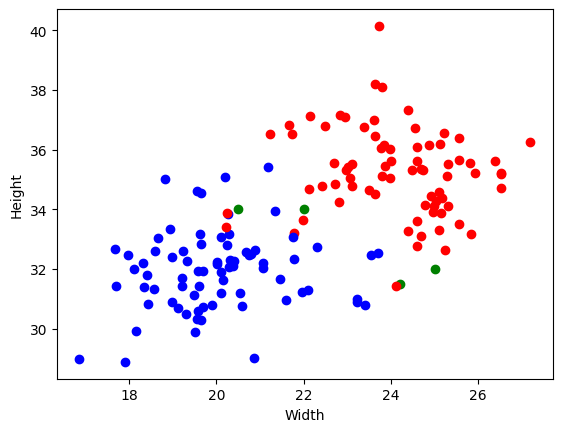

In [154]:
# Scatterplot testpoints   Green 

for i in testpoints:
    plt.scatter(i["width"], i["height"], marker = "o", color = "green")

#Scatterplot datapoints    Pikashu in red, Pichu in blue

for i in pokemon_list:
    if i["label"] == 0:
        plt.scatter(i["width"], i["height"], marker = "o", color = "blue")
    else:
        plt.scatter(i["width"], i["height"], marker = "o", color = "red")

# Add axis - labels
plt.xlabel("Width")
plt.ylabel("Height")

### Function to determine distance between datapoints and testpoints

In [155]:
import math

# For loop to calculate the distance and return the values in a list with desired key:value pairs. (In later assignments i effectivised this)
def list_distances(pokemon_list, testpoints):
    list_distances = []
    test_width = testpoints["width"]
    test_height = testpoints["height"]


    for i in pokemon_list:
        difference_width = (i["width"]- test_width)**2
        difference_height = (i["height"]- test_height)**2
        distance = math.sqrt(difference_width + difference_height)
        label = i["label"]
        list_distances.append({"distance": distance, "label": label})
    return list_distances

### Create the lists of distance for all testpoints

In [156]:
distance_list1 = list_distances(pokemon_list, testpoints[0])
distance_list2 = list_distances(pokemon_list, testpoints[1])
distance_list3 = list_distances(pokemon_list, testpoints[2])
distance_list4 = list_distances(pokemon_list, testpoints[3])

print(distance_list2)   # just for control

[{'distance': 2.2557001491052464, 'label': 0}, {'distance': 5.000134973720603, 'label': 1}, {'distance': 6.486205561934189, 'label': 0}, {'distance': 2.964989440060515, 'label': 1}, {'distance': 5.157932885353089, 'label': 1}, {'distance': 4.925367705290264, 'label': 0}, {'distance': 3.8702711671538257, 'label': 1}, {'distance': 6.6162845679926585, 'label': 1}, {'distance': 5.243652701472216, 'label': 1}, {'distance': 5.367714999626179, 'label': 0}, {'distance': 4.369845531409012, 'label': 1}, {'distance': 3.050905933231468, 'label': 1}, {'distance': 2.8433545155422912, 'label': 1}, {'distance': 3.081856445972628, 'label': 1}, {'distance': 5.492742220139161, 'label': 0}, {'distance': 5.859632749240489, 'label': 0}, {'distance': 3.650333833995459, 'label': 1}, {'distance': 2.3275356665040023, 'label': 1}, {'distance': 4.165691237268443, 'label': 0}, {'distance': 6.8152216876346685, 'label': 0}, {'distance': 5.838609903121851, 'label': 1}, {'distance': 4.386359146164021, 'label': 1}, {'d

### Sort the lists in ascending order and answer to the first part and **control of classification**

In [157]:
sorted_list1 = sorted(distance_list1, key=lambda x: x["distance"]) 
sorted_list2 = sorted(distance_list2, key=lambda x: x["distance"])
sorted_list3 = sorted(distance_list3, key=lambda x: x["distance"])
sorted_list4 = sorted(distance_list4, key=lambda x: x["distance"])
print(f"{sorted_list1[0] = }\n{sorted_list2[0] = }\n{sorted_list3[0] = }\n{sorted_list4[0] = }\n")   # Print index 0 for each list (smallest number)
print("The list represent the testpoints in the same order, Label 1 = PIKASHU, Label 2 = Pichu")

sorted_list1[0] = {'distance': 0.6829635758323602, 'label': 1}
sorted_list2[0] = {'distance': 0.12078857390630211, 'label': 1}
sorted_list3[0] = {'distance': 0.3542396645807627, 'label': 1}
sorted_list4[0] = {'distance': 0.2707605811313157, 'label': 0}

The list represent the testpoints in the same order, Label 1 = PIKASHU, Label 2 = Pichu


# Assignment 1

### Creating the input function

In [158]:
# Function för input, with try, except handling. 

def input_datapoints():
    input_list = []
    while True:
        try:
            input_width = float(input("Input width: "))
            input_height = float(input("Input height: "))
            if input_width < 0 or input_height < 0:            
                raise ValueError("Value must be positive")
            input_list.append({"width":float(input_width), "height":float(input_height)})
            break
        except ValueError:
            print("You have to enter a positive numeric number: ")        #Källa
    return input_list


Adding function for input in the function for distance

In [159]:
# Function för classificering

def classify_by_input():
    # take input with try, except handling

    input_data = input_datapoints()

    # calculate distances of input datapoints and pokemons datapoints, OBS FÖR ENSKILD DATAPUNKT
    distance_list = list_distances(pokemon_list, input_data[0])    # I enter index for input_data because list indeces cannot be string, within the loop it has to be something other than a string (the whole list is a string)
    
    # sort and print the distance_list
    sorted_list = sorted(distance_list, key=lambda x: x["distance"])
    return sorted_list

# Calling the functions to solve assignment 1

In [160]:
# Takes input width and height data, and classifies it into a Pikashu och Pichu
list_distance_input = classify_by_input()

print(f"{list_distance_input[0] = }")     # print the first index = smallest distance and see label, 0 = Pichu, 1 = Pikashu

if list_distance_input[0]["label"] == 0:
    print("This is classified as Pichu!")
else: 
    print("This is classified as Pikashu!")

list_distance_input[0] = {'distance': 9.071542292922365, 'label': 0}
This is classified as Pichu!


# Solution Assignment 2

### Ta reda på vilken pokemon testpoints är utifrån 10 närmsta distances

In [171]:
# Count occurences of Pichu and Pikashu in the smallest 10 distances
count_sorted_test1 = sum(1 for key in sorted_list1[0:10] if key['label'] == 0)
count_sorted_test2 = sum(1 for key in sorted_list2[0:10] if key['label'] == 0)
count_sorted_test3 = sum(1 for key in sorted_list3[0:10] if key['label'] == 0)
count_sorted_test4 = sum(1 for key in sorted_list4[0:10] if key['label'] == 0)

# print slices of already existing sorted lists and keep smallest 10 distances
#print(f"{sorted_list1[0:10] =}\n{sorted_list2[0:10] =}\n{sorted_list3[0:10] =}\n{sorted_list4[0:10] =}\n") 

print(f"{count_sorted_test1 = } Pichu, and {10 - count_sorted_test1} Pikashu") 
print(f"{count_sorted_test2 = } Pichu, and {10 - count_sorted_test2} Pikashu") 
print(f"{count_sorted_test3 = } Pichu, and {10 - count_sorted_test3} Pikashu") 
print(f"{count_sorted_test4 = } Pichu, and {10 - count_sorted_test4} Pikashu") 

count_sorted_test1 = 2 Pichu, and 8 Pikashu
count_sorted_test2 = 5 Pichu, and 5 Pikashu
count_sorted_test3 = 3 Pichu, and 7 Pikashu
count_sorted_test4 = 8 Pichu, and 2 Pikashu


## Bonusuppgift
### Assignment 3 - creating the function to randomize the list according to the instructions

In [172]:

# Dela in ursprungsdatan slumpmässigt så att 100 är träningsdata (50 Pikashu, 50 Pichu), 50 testdata (25 Pikashu, 25 Pichu)
import random

def randomize_list(pokemon_list):
    random.shuffle(pokemon_list)      # Randomize values in list of pokemons

    # Separate the shuffled values into Pikashu and Pichu lists to pick the correct amount of traning/test data.
    pikashu_list = []
    pichu_list = []
    for item in pokemon_list:
        if item['label'] == 1:
            pikashu_list.append(item)
        else:
            pichu_list.append(item)

    # Picking traning and test data according to instructions of the assignment
    training_data1 = pikashu_list[:50]              # takes 50 Pikashu training data values from the shuffled pokemon_list
    training_data2 = pichu_list[:50]                # takes 50 Pichu training data values from the shuffled pokemon_list

    test_data1 = pikashu_list[50:]                  # takes 25 Pikashu test data values from the shuffled pokemon_list
    test_data2 = pichu_list[50:]                    # takes 25 Pichu test data values from the shuffled pokemon_list

    # all training and test data combined in separate lists 
    training_data = training_data1 + training_data2
    test_data = test_data1 + test_data2

    return training_data, test_data




# Solution assignment 3 with the created function, returning training and testdata variables

In [178]:
# Unpacking of the variables created in the function

training_data, test_data = randomize_list(pokemon_list)

count_pikashu_training = sum(1 for key in training_data if key['label'] == 1)
count_pichu_training = sum(1 for key in training_data if key['label'] == 0)

count_pikashu_test = sum(1 for key in test_data if key['label'] == 1)
count_pichu_test = sum(1 for key in test_data if key['label'] == 0)

print(f"{count_pikashu_training = }\n{count_pichu_training = }\n{count_pikashu_test = }\n{count_pichu_test = }\n")

count_pikashu_training = 50
count_pichu_training = 50
count_pikashu_test = 25
count_pichu_test = 25



### Assignment 4  - creating functions to use in the solutions

### Function to create a list of all the distances of the test_data

In [179]:
# This function returns a list, with separate lists for all distances of each testpoint
def model_testing(training_data, test_data):    # function to count all distances for each testpoint and place each iteration in list within list
    
    list_distances = []   

    for test in test_data:         #Loop through test_data list
        list_distance = []
        for training in training_data:       # Calculate distance for test_data point and all training data
            difference_width = (training["width"]- test["width"])**2
            difference_height = (training["height"]- test["height"])**2
            distance = math.sqrt(difference_width + difference_height)
            training_label = training["label"]     
            test_label = test["label"]
            list_distance.append({"distance": distance, "training_label": training_label, "test_label": test_label})    # appending the distances to a list, labels for comparison
        list_distances.append(list_distance)       # appending the list of distances to a list, in order to know which list is for which datapoint
    return list_distances



### Sort the innerlists in ascending order

In [180]:

def sort_innerlists(list_distances):
# sort the innerlists of the list in ascending order
    sorted_innerlists = []
    for list in list_distances:
        sorted_innerlist = sorted(list, key=lambda list: list["distance"])   # Källa: https://www.freecodecamp.org/news/sort-dictionary-by-value-in-python/
        sorted_innerlists.append(sorted_innerlist)
    return sorted_innerlists



### Function to calculate the accuracy of the model

In [181]:
# Defining what the measurement variables mean:
# TP: training_label = 1,  test_label = 1
# FP: training_label = 0,  test_label = 1
# FN: training_label = 1,  test_label = 0
# TN: training_label = 0,  test_label = 0

# Function for calculating accuracy

def calculate_accuracy(sorted_innerlists):

    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    for list in sorted_innerlists:
        if list[0]['training_label'] == 1 and list[0]['test_label'] == 1:
            TP += 1
        elif list[0]['training_label'] == 0 and list[0]['test_label'] == 0:
            TN += 1
        elif list[0]['training_label'] == 1 and list[0]['test_label'] == 0:
            FN += 1
        elif list[0]['training_label'] == 0 and list[0]['test_label'] == 1:
            FP += 1

    accuracy = (TP + TN)/(TP + TN + FP + FN)
    return accuracy

# Solution assignment 4

In [182]:
#Assignment 4 solution

# 1. Create a list with innerlists of the distances between each test datapoint and all training datapoints(test and training data alreade prepared)
list_distances = model_testing(training_data, test_data)   # use function to create the list of distances

# 2. Sort the innerlists of the created lists, in ascending order
sorted_innerlists = sort_innerlists(list_distances)

# 3. Calculate the accuracy
accuracy = calculate_accuracy(sorted_innerlists)

print(f"The accuracy of the model is {accuracy}")

The accuracy of the model is 0.98


# Solution last part of assignment 4
#### Repeating steps of assignment 3 and 4, 10 times, plotting the accuracy and report mean accuracy

In [183]:
#Assignment 4 last part solution

# Solution steps: Loop 10 times through these steps and save the returned output in a list

# 1. Shuffle the pokemon list
# Unpacking of the variables created in the function
# training_data, test_data = randomize_list(pokemon_list)

# 2. Create a list with innerlists of the distances between each test datapoint and all training datapoints(test and training data alreade prepared)
#list_distances = model_testing(training_data, test_data)   # use function to create the list of distances

# 3. Sort the innerlists of the created lists, in ascending order
#sorted_innerlists = sort_innerlists(list_distances)

# 4. Calculate the accuracy
#accuracy = calculate_accuracy(sorted_innerlists)

list_accuracies = []    # Accuracies for all 10 tests to be plotted
for i in range(10):
    training_data, test_data = randomize_list(pokemon_list)
    list_distances = model_testing(training_data, test_data)
    sorted_innerlists = sort_innerlists(list_distances)
    accuracy = calculate_accuracy(sorted_innerlists)
    list_accuracies.append(accuracy)

print(f"The accuracies in the 10 test rounds are: {list_accuracies}")


The accuracies in the 10 test rounds are: [0.96, 0.96, 1.0, 1.0, 0.96, 1.0, 0.94, 0.94, 0.92, 1.0]


# Solution calculating the mean

In [184]:
# mean = total/count
total = sum(list_accuracies)
count = len(list_accuracies)
mean = total/count

print(f"The mean accuracy for the 10 test rounds is {mean}") 

The mean accuracy for the 10 test rounds is 0.968


# Solution Plotting the graph

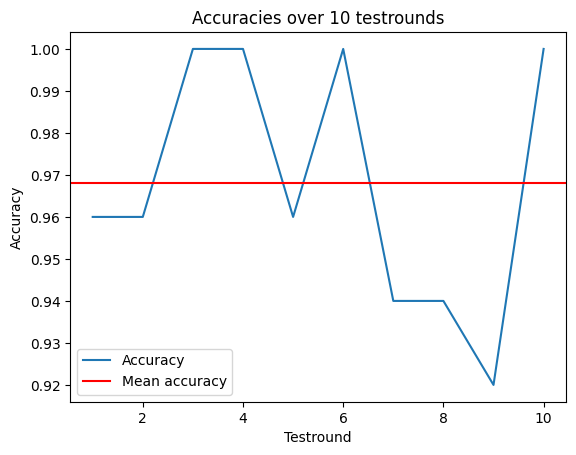

In [185]:
y = list_accuracies
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

plt.title("Accuracies over 10 testrounds")
plt.xlabel("Testround")
plt.ylabel("Accuracy")
plt.plot(x, y, label = "Accuracy")
plt.axhline(y = mean, color = "red", label = "Mean accuracy")
plt.legend()
plt.show()